# Topic Modeling

In [126]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd

import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from gensim import corpora, models, similarities
import pyLDAvis.gensim

In [127]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [128]:
# load dataset
data = pd.read_csv('quora_questions.csv')
data.head()

,Question
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [129]:
print('We have',len(data), 'questions in the data')

We have 404289 questions in the data


In [130]:
data.Question

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404284    How many keywords are there in the Racket prog...
404285            Do you believe there is life after death?
404286                                    What is one coin?
404287    What is the approx annual cost of living while...
404288                What is like to have sex with cousin?
Name: Question, Length: 404289, dtype: object

## Data Processing

Next, we will use TfidfVectorizer from scikit learn to extract all the word counts.

In [131]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [132]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [133]:
data_t = tfidf.fit_transform(data['Question'])
data_t.shape

(404289, 38669)

## Topic Modeling with LDA - Sklearn

In [134]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda_model = LDA(n_components=20,random_state=42,batch_size =1000)
lda_model.fit(data_t)

LatentDirichletAllocation(batch_size=1000, n_components=20, random_state=42)

### Displaying Topics

In [135]:
len(tfidf.get_feature_names())

38669

In [136]:
import random

In [137]:
for i in range(10):
    random_word_id = random.randint(0,38669)
    print(tfidf.get_feature_names()[random_word_id])

erupt
elsinore
erectile
discriminate
totally
unscientific
listener
collapsing
slovaks
marzia


In [138]:
len(lda_model.components_)

20

In [139]:
lda_model.components_

array([[0.05      , 0.05      , 0.05      , ..., 0.05      , 1.82820011,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       ...,
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 4.76366808, 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.05      , 0.05      , 0.05      , ..., 1.17648291, 0.05      ,
        1.17648291]])

In [140]:
len(lda_model.components_[0])

38669

In [141]:
single_topic = lda_model.components_[0]

In [142]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([38668, 24767, 24764, ..., 10512, 21413,  4632], dtype=int64)

In [143]:
# Word least representative of this topic
single_topic[38668]

0.05

In [144]:
# Word most representative of this topic
single_topic[4632]

736.3655823932751

In [145]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([21780, 33892,  7968, 10305, 11005, 31059, 32134, 10512, 21413,
        4632], dtype=int64)

In [146]:
top_word_indices = single_topic.argsort()[-10:]

In [147]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

media
sydney
company
development
does
service
social
digital
marketing
best


### View all the 20 topics found

In [148]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['course', 'services', 'product', 'funniest', 'india', 'good', 'source', 'heard', 'web', 'friends', 'media', 'sydney', 'company', 'development', 'does', 'service', 'social', 'digital', 'marketing', 'best']


THE TOP 20 WORDS FOR TOPIC #1
['fluently', 'spanish', 'olympics', 'job', 'correct', 'doctor', 'addiction', 'best', 'used', 'interview', 'process', 'making', 'does', 'speak', 'god', 'porn', 'sentence', 'tips', 'english', 'word']


THE TOP 20 WORDS FOR TOPIC #2
['time', 'suitable', 'teacher', 'inpatient', 'indian', 'actor', 'rehab', 'spotify', 'county', 'best', 'gst', 'good', 'drug', 'structure', 'does', 'india', 'center', 'alcohol', 'successful', 'education']


THE TOP 20 WORDS FOR TOPIC #3
['macbook', 'pro', 'apple', 'best', 'does', 'interesting', 'asked', 'series', 'big', 'facts', 'don', 'know', 'exist', 'tv', 'answers', 'mind', 'iphone', 'people', 'questions', 'quora']


THE TOP 20 WORDS FOR TOPIC #4
['passport', 'visa', 'javascript', 'western', 'rea

### Attaching Discovered Topic Labels to Original Articles

In [149]:
topic_results = lda_model.transform(data_t)
data['Topic'] = topic_results.argmax(axis=1)

In [150]:
data.head(20)

,Question,Topic
0,What is the step by step guide to invest in sh...,16
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,17
2,How can I increase the speed of my internet co...,8
3,Why am I mentally very lonely? How can I solve...,19
4,"Which one dissolve in water quikly sugar, salt...",17
5,Astrology: I am a Capricorn Sun Cap moon and c...,2
6,Should I buy tiago?,17
7,How can I be a good geologist?,15
8,When do you use シ instead of し?,3
9,Motorola (company): Can I hack my Charter Moto...,7


In [151]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

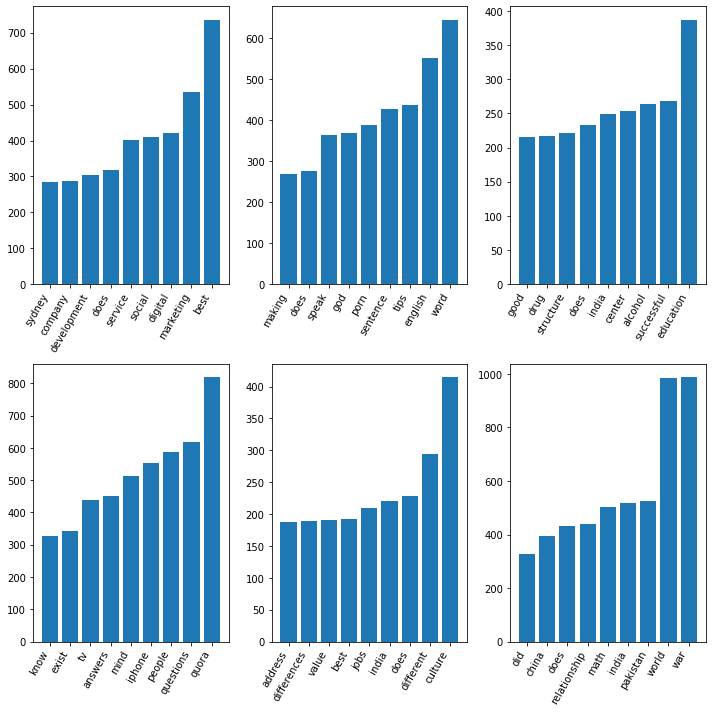

In [152]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 20
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lda_model.components_):
    plot_important_features(coef, feature_names, top_n=9, ax=ax)
    
plt.tight_layout()

## Topic Modeling with NMF - Sklearn

In [208]:
from sklearn.decomposition import NMF

In [209]:
model = NMF(n_components=20,random_state=42)

In [210]:
# fit the model to train data
model.fit(data_t)

C:\Users\ektam\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



NMF(n_components=20, random_state=42)

### Displaying Topics

In [211]:
len(tfidf.get_feature_names())

38669

In [212]:
import random

In [213]:
for i in range(10):
    random_word_id = random.randint(0,38669)
    print(tfidf.get_feature_names()[random_word_id])

crpc
15kgs
caliph
bronze
81
vijayawada
cliffhanger
blackmoney
oxygenated
canada


In [214]:
len(model.components_)

20

In [215]:
model.components_

array([[0.        , 0.05630369, 0.00005402, ..., 0.        , 0.        ,
        0.        ],
       [0.00123892, 0.        , 0.00003453, ..., 0.        , 0.00365013,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00040789, 0.00492671, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00007847, 0.00045445, 0.00006058, ..., 0.0017048 , 0.        ,
        0.0017048 ],
       [0.00034502, 0.        , 0.00000482, ..., 0.        , 0.        ,
        0.        ]])

In [216]:
len(model.components_[0])

38669

In [217]:
single_topic = model.components_[0]

In [218]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([    0, 22613, 22611, ...,  5268, 22925,  4632], dtype=int64)

In [219]:
# Word most representative of this topic
single_topic[4632]

8.248757393974028

In [220]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([26057,  5976, 19847, 22924, 37520,   482,  5283,  5268, 22925,
        4632], dtype=int64)

In [221]:
top_word_indices = single_topic.argsort()[-10:]

In [222]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

phone
buy
laptop
movie
ways
2016
books
book
movies
best


### View all the 20 topics found

In [223]:
for index,topic in enumerate(model.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['app', 'engineering', 'friend', 'website', 'site', 'thing', 'read', 'place', 'visit', 'places', 'phone', 'buy', 'laptop', 'movie', 'ways', '2016', 'books', 'book', 'movies', 'best']


THE TOP 20 WORDS FOR TOPIC #1
['come', 'relationship', 'says', 'universities', 'grads', 'majors', 'recruit', 'sex', 'looking', 'differ', 'use', 'exist', 'really', 'compare', 'cost', 'long', 'feel', 'work', 'mean', 'does']


THE TOP 20 WORDS FOR TOPIC #2
['users', 'writer', 'marked', 'search', 'use', 'add', 'answered', 'needing', 'post', 'easily', 'improvement', 'delete', 'asked', 'google', 'answers', 'answer', 'ask', 'question', 'questions', 'quora']


THE TOP 20 WORDS FOR TOPIC #3
['com', 'facebook', 'job', 'easiest', 'making', 'using', 'website', 'investment', 'friends', 'black', 'internet', 'free', 'home', 'easy', 'youtube', 'ways', 'earn', 'online', 'make', 'money']


THE TOP 20 WORDS FOR TOPIC #4
['embarrassing', 'decision', 'biggest', 'work', 'did', 'balance', 'earth',

### Attaching Discovered Topic Labels to Original Articles

In [224]:
topic_results = model.transform(data_t)
data['Topic'] = topic_results.argmax(axis=1)

In [225]:
data.head(20)

,Question,Topic
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,17
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14
5,Astrology: I am a Capricorn Sun Cap moon and c...,1
6,Should I buy tiago?,0
7,How can I be a good geologist?,10
8,When do you use シ instead of し?,19
9,Motorola (company): Can I hack my Charter Moto...,17


In [226]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

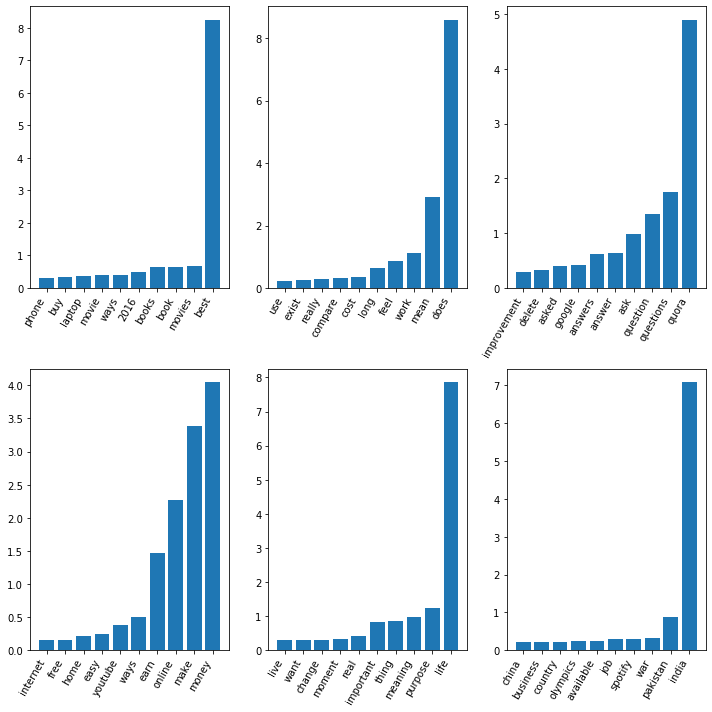

In [227]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 20
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), model.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

## Topic Modeling with Randomized_SVD - Sklearn

In [228]:
from sklearn.decomposition import randomized_svd

In [229]:
u, s, v = randomized_svd(data_t,n_components=20)

In [230]:
# fit the model to train data
u.shape

(404289, 20)

In [231]:
s.shape

(20,)

In [232]:
v.shape

(20, 38669)

### Displaying Topics

In [233]:
len(tfidf.get_feature_names())

38669

In [234]:
import random

In [235]:
for i in range(10):
    random_word_id = random.randint(0,38669)
    print(tfidf.get_feature_names()[random_word_id])

bloomberg
fairly
nco
mandelbrot
hayao
organism
trap
disobeying
aghori
decor


In [236]:
len(v)

20

In [237]:
v

array([[ 0.00014443,  0.00869427,  0.00000593, ...,  0.00000091,
         0.00002589,  0.00000091],
       [ 0.00025945,  0.00259847,  0.00000195, ...,  0.00000161,
         0.00020811,  0.00000161],
       [-0.00012117,  0.0000124 , -0.00000222, ..., -0.00000049,
        -0.00021845, -0.00000049],
       ...,
       [ 0.00006563,  0.00231691, -0.00000978, ..., -0.00007925,
        -0.00000847, -0.00007925],
       [ 0.00002404,  0.01119009,  0.00002135, ...,  0.00019265,
        -0.00001407,  0.00019265],
       [ 0.00014058, -0.00684001,  0.00002068, ...,  0.00019207,
        -0.00001912,  0.00019207]])

In [238]:
len(v[0])

38669

In [239]:
single_topic = v[0]

In [240]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([37727, 20551, 13968, ..., 20023, 37515,  4632], dtype=int64)

In [241]:
# Word least representative of this topic
single_topic[37727]

-1.8501022785205145e-23

In [242]:
# Word most representative of this topic
single_topic[4632]

0.8306956605064137

In [243]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([20286, 28046, 24561, 11005, 21116, 22673, 17507, 20023, 37515,
        4632], dtype=int64)

In [244]:
top_word_indices = single_topic.argsort()[-10:]

In [245]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index])

life
quora
online
does
make
money
india
learn
way
best


### View all the 20 topics found

In [246]:
for index,topic in enumerate(v):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['english', 'good', 'people', 'time', 'movies', 'language', 'programming', 'book', 'ways', 'books', 'life', 'quora', 'online', 'does', 'make', 'money', 'india', 'learn', 'way', 'best']


THE TOP 20 WORDS FOR TOPIC #1
['love', 'good', 'india', 'know', 'trump', 'ask', 'earn', 'question', 'online', 'work', 'life', 'feel', 'questions', 'mean', 'like', 'people', 'make', 'money', 'quora', 'does']


THE TOP 20 WORDS FOR TOPIC #2
['needing', 'add', 'post', 'answered', 'improvement', 'delete', 'earn', 'easily', 'online', 'asked', 'google', 'make', 'answer', 'answers', 'money', 'ask', 'question', 'people', 'questions', 'quora']


THE TOP 20 WORDS FOR TOPIC #3
['ban', 'free', 'easiest', 'banning', 'home', 'rs', 'easy', 'rupee', 'india', 'youtube', 'black', 'ways', 'notes', '1000', 'way', '500', 'earn', 'online', 'make', 'money']


THE TOP 20 WORDS FOR TOPIC #4
['hillary', 'clinton', 'meaning', 'day', 'president', 'important', 'thing', 'love', 'things', 'purpose', 'li

### Attaching Discovered Topic Labels to Original Articles

In [247]:
u[0].round(2)

array([ 0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0.])

In [248]:
u[0].argmax()

5

In [249]:
data.head()

,Question,Topic
0,What is the step by step guide to invest in sh...,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,17
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",14


In [250]:
u.argmax(axis=1)

array([ 5, 16, 19, ...,  8, 11,  9], dtype=int64)

In [251]:
data['Topic'] = u.argmax(axis=1)

In [252]:
data.iloc[1:10,:]

,Question,Topic
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,16
2,How can I increase the speed of my internet co...,19
3,Why am I mentally very lonely? How can I solve...,11
4,"Which one dissolve in water quikly sugar, salt...",1
5,Astrology: I am a Capricorn Sun Cap moon and c...,1
6,Should I buy tiago?,0
7,How can I be a good geologist?,10
8,When do you use シ instead of し?,18
9,Motorola (company): Can I hack my Charter Moto...,19


In [253]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

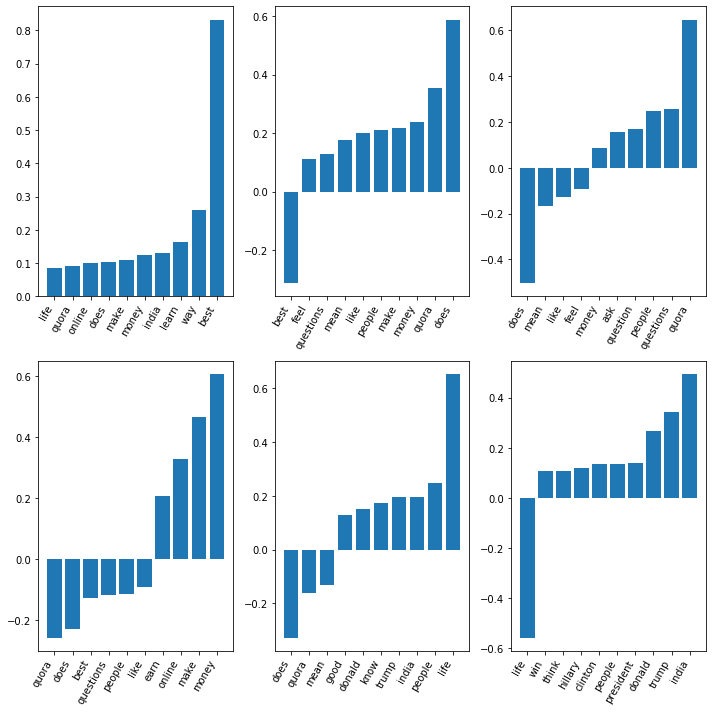

In [254]:
feature_names = np.array(tfidf.get_feature_names())
n_components = 20
fig, axes = plt.subplots(2,3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), v):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()